### ** 해석과 판단의 이유를 모두 상세하게 적어주세요 **


In [81]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings("ignore")

In [82]:
plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [83]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data.head()
data = data.iloc[:,1:] # 데이터 index 열 제거 

# Linear Regression

### 1. Data Description

In [84]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [85]:
data.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [86]:
data.drop(columns = ['New_Price'], inplace = True)

* 결측치를 확인해 보면 다음과 같다.
  * New_price 의 경우 대부분이 결측치로 존재하기 때문에 제거해준다.
  * Mileage, Engine, Power, Seats의 경우는 전체 데이터에서 결측치가 차지하는 비중이 작기 때문에 평균, 최빈값으로 대체한다.

In [87]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [88]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


* 변수들 중 `Fuel_Type`, `Transmission`, `Owner_Type`은 문자열 데이터 이므로 분석을 위해 Categorical Variables로 변환을 해야한다. 
* 변수 `Mileage`, `Engine`, `Power`은 문자가 섞여 있기 때문에 문자열을 제거하여 numerical variables로 변환 해야한다. 

### 2. Data Processing

- `Fuel_Type`, `Transmission`, `Owner_Type` **→ Categorical Variables**
- `Mileage`, `Engine`, `Power` **→ Numerical Variables**d

In [89]:
data['Fuel_Type'] = data['Fuel_Type'].astype('category').cat.codes
data['Transmission'] = data['Transmission'].astype('category').cat.codes
data['Owner_Type'] = data['Owner_Type'].astype('category').cat.codes

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   int8   
 5   Transmission       6019 non-null   int8   
 6   Owner_Type         6019 non-null   int8   
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), int8(3), object(5)
memory usage: 441.0+ KB


In [91]:
def makefloat(x) :
    if pd.isna(x)  : 
        return x
    else :      
        if x == "null bhp" : # Power 에 null 이라는 데이터가 존재하여 -1 로 return
            return np.nan
        else :
            x = float(x.split()[0])
        return x

In [92]:
data['Mileage'] = data['Mileage'].apply(makefloat)
data['Engine'] = data['Engine'].apply(makefloat)
data['Power'] = data['Power'].apply(makefloat)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   int8   
 5   Transmission       6019 non-null   int8   
 6   Owner_Type         6019 non-null   int8   
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), int8(3), object(2)
memory usage: 441.0+ KB


#### 2-1. Handling of the missing values

* 회귀분석을 위하여 결측치를 대표적 통계값으로 지정해 준다 .
* 기존의 데이터와 분포를 비슷하게 맞추기 위하여 `Mileage`는 평균값으로 `Engine`, `Power`은 중앙값으로 `Seats`는 최빈값으로 지정해준다.

In [94]:
data.isna().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [95]:
data.Mileage.describe(), data.Engine.describe(), data.Power.describe(), data.Seats.describe()

(count    6017.000000
 mean       18.134961
 std         4.582289
 min         0.000000
 25%        15.170000
 50%        18.150000
 75%        21.100000
 max        33.540000
 Name: Mileage, dtype: float64,
 count    5983.000000
 mean     1621.276450
 std       601.355233
 min        72.000000
 25%      1198.000000
 50%      1493.000000
 75%      1984.000000
 max      5998.000000
 Name: Engine, dtype: float64,
 count    5876.000000
 mean      113.253050
 std        53.874957
 min        34.200000
 25%        75.000000
 50%        97.700000
 75%       138.100000
 max       560.000000
 Name: Power, dtype: float64,
 count    5977.000000
 mean        5.278735
 std         0.808840
 min         0.000000
 25%         5.000000
 50%         5.000000
 75%         5.000000
 max        10.000000
 Name: Seats, dtype: float64)

In [96]:
data.Mileage.replace(np.nan, data.Mileage.mean(), inplace=True)
data.Engine.replace(np.nan, data.Engine.median(), inplace= True)
data.Power.replace(np.nan, data.Power.median(), inplace=True)
data.Seats.replace(np.nan, data.Seats.mode()[0], inplace =True)

In [97]:
data.Mileage.describe(), data.Engine.describe(), data.Power.describe(), data.Seats.describe()

(count    6019.000000
 mean       18.134961
 std         4.581528
 min         0.000000
 25%        15.170000
 50%        18.150000
 75%        21.100000
 max        33.540000
 Name: Mileage, dtype: float64,
 count    6019.000000
 mean     1620.509221
 std       599.635458
 min        72.000000
 25%      1198.000000
 50%      1493.000000
 75%      1969.000000
 max      5998.000000
 Name: Engine, dtype: float64,
 count    6019.000000
 mean      112.883539
 std        53.283701
 min        34.200000
 25%        78.000000
 50%        97.700000
 75%       138.030000
 max       560.000000
 Name: Power, dtype: float64,
 count    6019.000000
 mean        5.276790
 std         0.806346
 min         0.000000
 25%         5.000000
 50%         5.000000
 75%         5.000000
 max        10.000000
 Name: Seats, dtype: float64)

In [98]:
data.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

#### 2-2. Target distribution

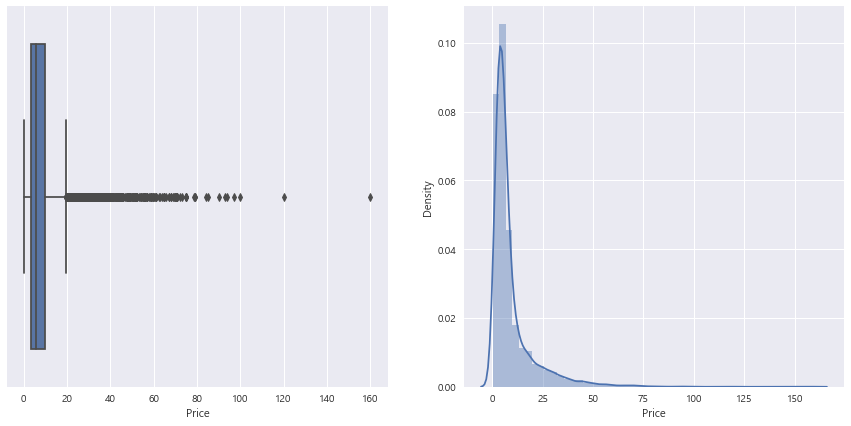

3.3352319876668415


In [99]:
f, axes = plt.subplots(1,2, figsize = (15,7))

sns.boxplot(data['Price'], ax = axes[0])
sns.distplot(data['Price'], ax = axes[1])
plt.show()

print(data['Price'].skew())

* Target 변수의 boxplot을 확인해 보면 boundary를 넘어서는 값들, 이상치들이 많이 존재한다. 또한 distplot을 확인해 보면 왼쪽으로 분포가 치우친 skewed한 데이터임을 확인할 수 있다. 
* `Price`의 왜도를 확인해 보면 3이상의 값으로 skewed한 데이터이므로 log변환을 하여 scaling을 해야한다

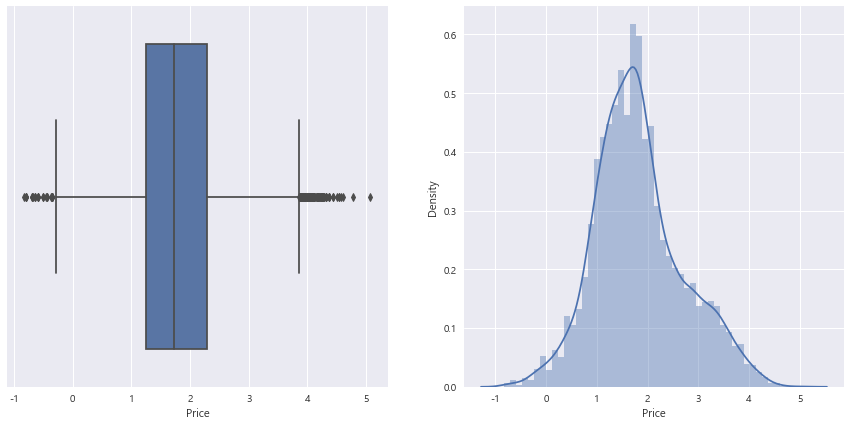

0.4173906918413524


In [100]:
data['Price'] = np.log(data['Price'])

f, axes = plt.subplots(1,2, figsize = (15,7))

sns.boxplot(data['Price'], ax = axes[0])
sns.distplot(data['Price'], ax = axes[1])
plt.show()

print(data['Price'].skew())

* log 변환을 진행한 후 boxplot을 확인해 보면 이상치는 존재하지만 distplot과 왜도 값을 보면 정규 분포의 형태를 확인 할 수 있다.
* 따라서 예측을 위해 log 변환이 적당하다라는 것을 확인하였고 이를 실제 데이터에 적용할때 다시 지수 변환을 통해 예측하는 모델을 구성하면 될 것이다.

#### 2-3. 변수들 간의 상관관계

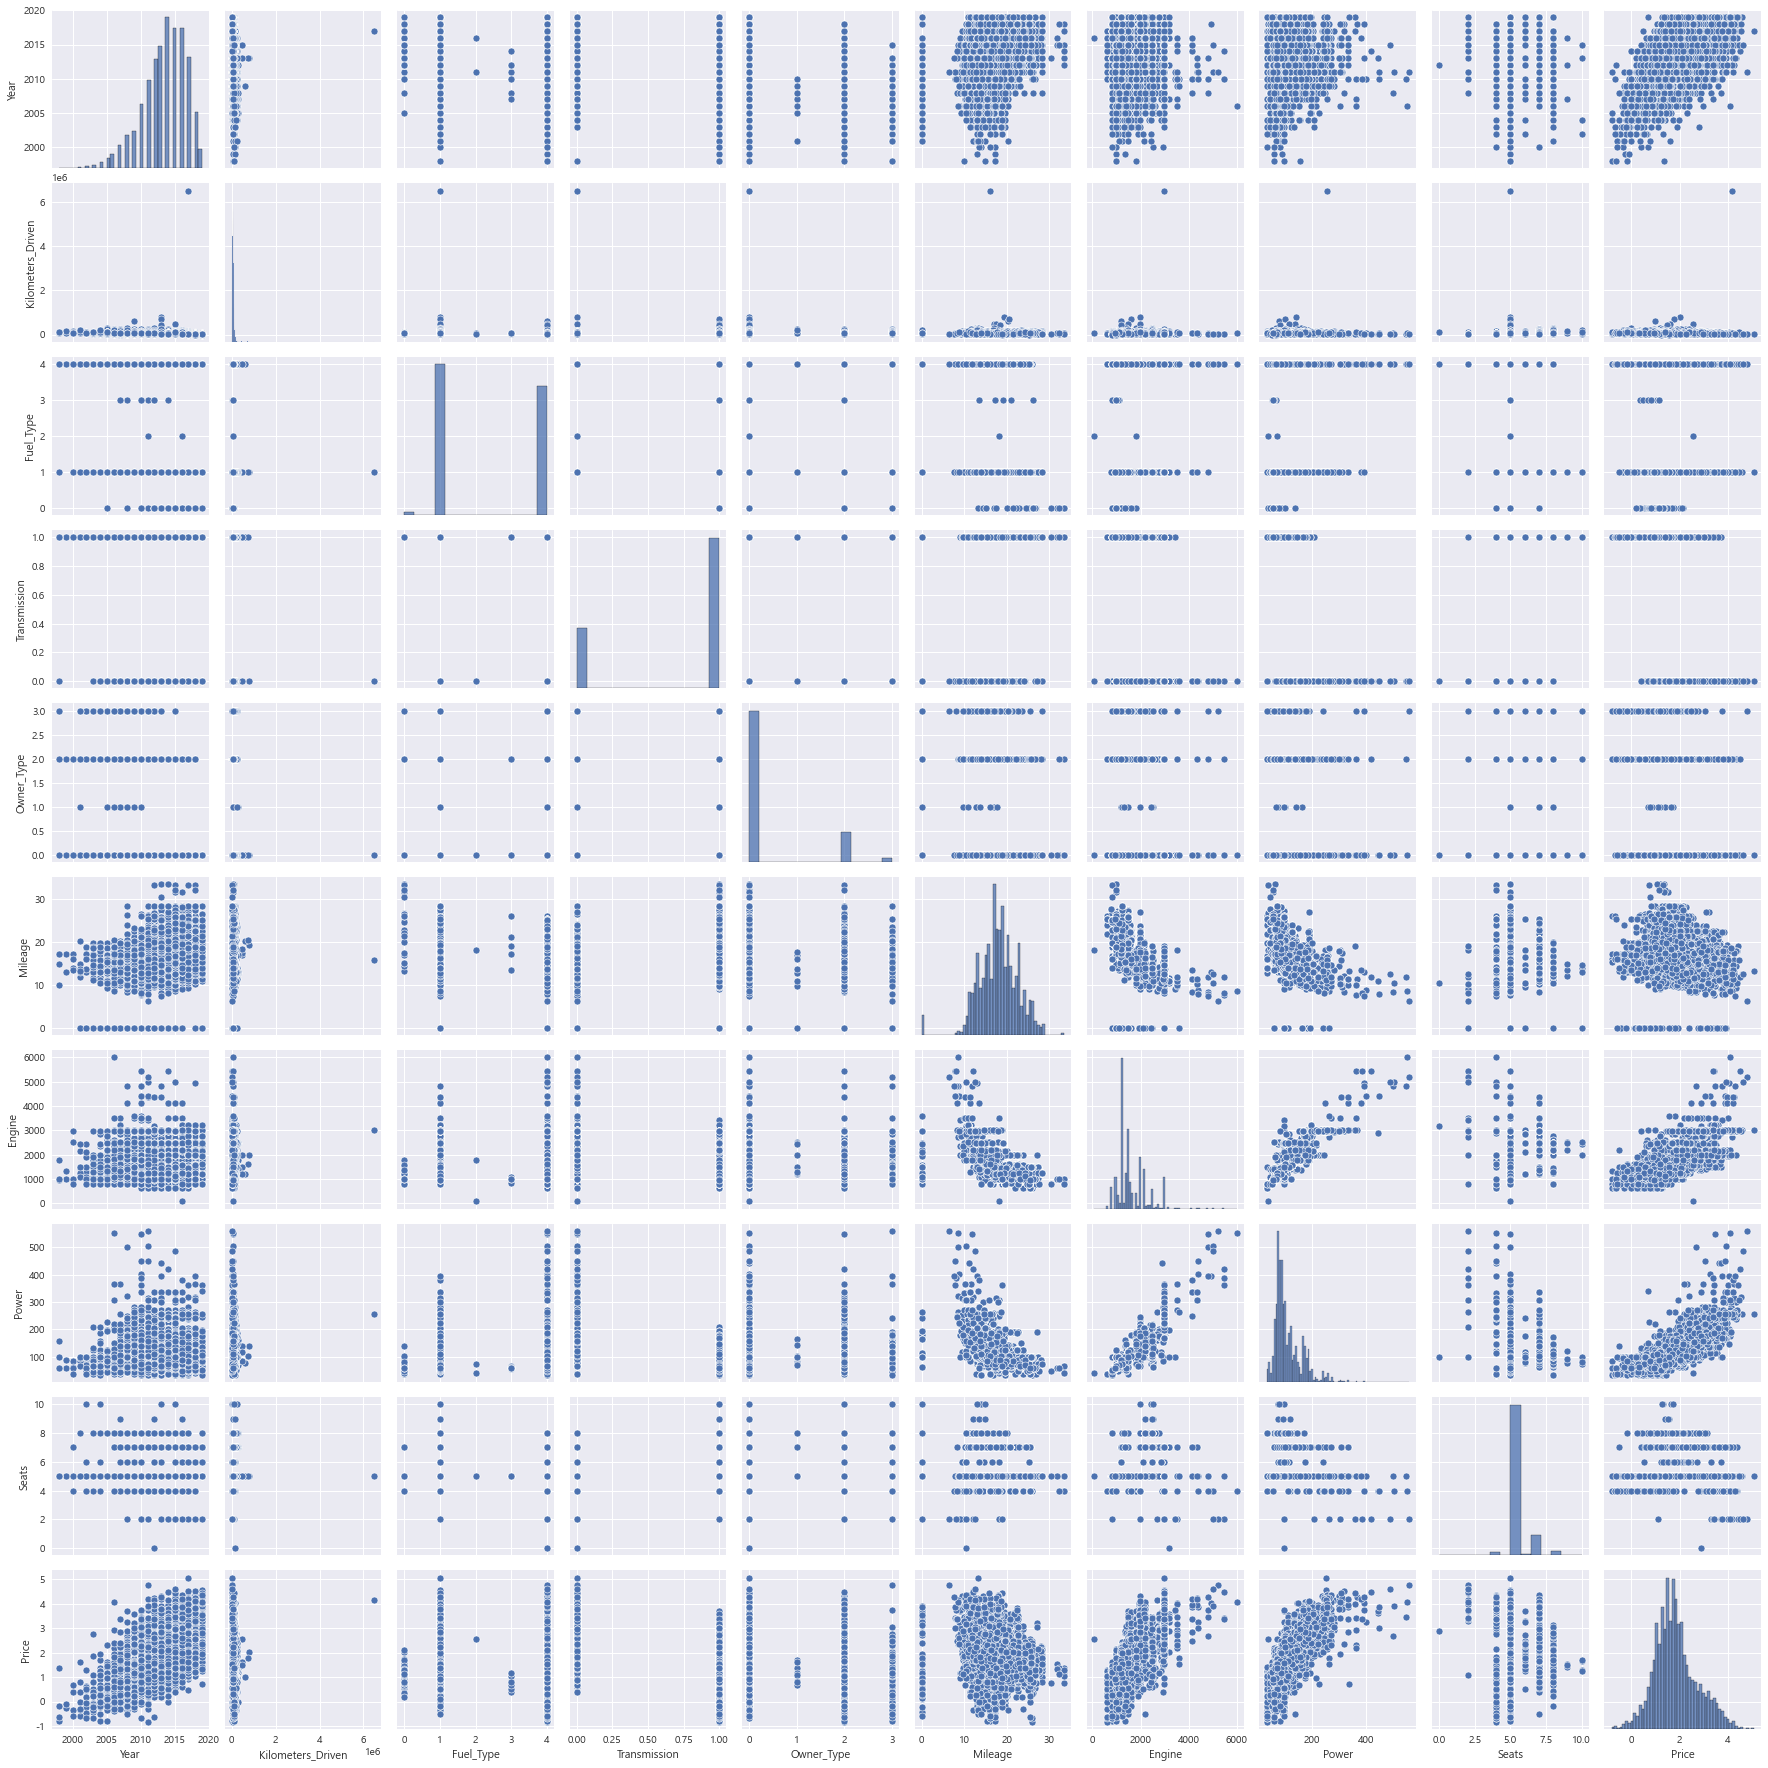

In [101]:
sns.pairplot(data)
plt.show()


* 대부분의 변수들이 선형성을 만족한다고 볼 수 있지만 `Mileage`의 경우 경향을 띄지 않아 보인다.
* `Mileage` 와 `Engine`, `Power`은 상관관계가 있어 보이며 `Engine`과 `Power`도 상관관계가 보인다. 이는 추후에 다중공선성을 확인해한다.

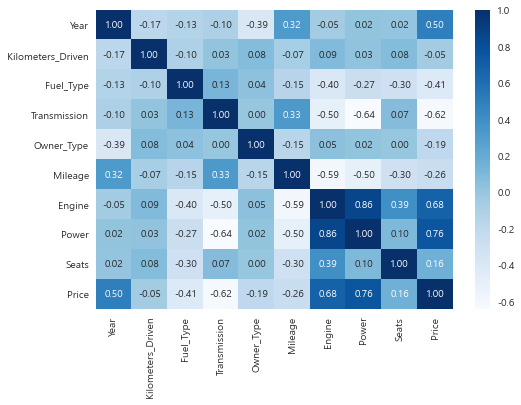

In [102]:
sns.heatmap(data = data.corr(), annot = True, fmt = '.2f', cmap = 'Blues')
plt.show()

* `Engine`과 `Power`는 높은 양의 상관관계를 보이고 있다.
* `Mileage`와 `Engine`, `Power`또한 상관계수가 0.7 보다는 작지만 산점도를 통해 확인해본 결과 선형 관계를 가짐을 알 수 있다.
* `Transmission`와 `Engine`, `Power`또한 상관관계가 존재한다고 볼 수 있으므로 이는 별도로 체크해야 한다.
<br>
<br>
* **Target variable과의 상관관계도 확인한 결과, 상관관계가 지나치게 높은 변수는 보이지 않는다.**

#### 2-4 다중공선성 확인

In [103]:
X = data.iloc[:, 2:-1]

In [104]:
# VIF check 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
0,205.675978,Year
8,74.612767,Seats
6,64.025501,Engine
5,38.386581,Mileage
7,33.596189,Power
3,6.238883,Transmission
2,6.204804,Fuel_Type
1,1.457045,Kilometers_Driven
4,1.259407,Owner_Type


    * 다중공선성 의심 변수 : `Year`, `Seats`, `Engine`, `Mileage`, `Power`
    * 하나씩 확인을 하며 다중공선성 문제를 해결해 보아야 한다.

In [105]:
for i in ['Year', 'Seats', 'Engine', 'Mileage', 'Power'] :
    print("Variable : ", i)
    X1 = X.drop(columns = i , axis = 1)
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
    vif["features"] = X1.columns
    print(vif.sort_values(["VIF Factor"], ascending=[False]))


Variable :  Year
   VIF Factor           features
5   61.418581             Engine
7   46.867548              Seats
6   32.209840              Power
4   13.858170            Mileage
2    6.174773       Transmission
1    3.566563          Fuel_Type
0    1.451341  Kilometers_Driven
3    1.239943         Owner_Type
Variable :  Seats
   VIF Factor           features
0  129.194092               Year
6   52.979390             Engine
5   36.826473            Mileage
7   28.672279              Power
3    6.097906       Transmission
2    5.992297          Fuel_Type
1    1.456906  Kilometers_Driven
4    1.255037         Owner_Type
Variable :  Engine
   VIF Factor           features
0  197.301491               Year
7   61.740070              Seats
5   32.294662            Mileage
6   12.833716              Power
3    6.212193       Transmission
2    5.216826          Fuel_Type
1    1.453730  Kilometers_Driven
4    1.259250         Owner_Type
Variable :  Mileage
   VIF Factor           features
0 

<br>

* **하나의 변수만 제거하면 다중공선성의 문제가 해결이 안되기 때문에 여러 변수들을 제거하여 다중공선성 문제를 해결해야한다.**

In [106]:
for i in ['Seats', 'Engine', 'Mileage', 'Power'] :
    print("Variable : ", i)
    X2 = X.drop(columns = [i,'Year'] , axis = 1)
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
    vif["features"] = X2.columns
    print(vif.sort_values(["VIF Factor"], ascending=[False]))

Variable :  Seats
   VIF Factor           features
5   31.870963             Engine
6   28.623130              Power
4    8.864623            Mileage
2    5.727803       Transmission
1    3.120227          Fuel_Type
0    1.449475  Kilometers_Driven
3    1.239370         Owner_Type
Variable :  Engine
   VIF Factor           features
6   24.320227              Seats
4   11.609161            Mileage
5    8.250182              Power
2    6.126827       Transmission
1    3.103876          Fuel_Type
0    1.445812  Kilometers_Driven
3    1.238219         Owner_Type
Variable :  Mileage
   VIF Factor           features
4   51.451111             Engine
6   29.979654              Seats
5   27.958243              Power
2    5.532236       Transmission
1    3.552408          Fuel_Type
0    1.451255  Kilometers_Driven
3    1.234413         Owner_Type
Variable :  Power
   VIF Factor           features
6   41.648636              Seats
5   15.731666             Engine
4   12.028935            Mileage
2

In [107]:
for i in ['Seats', 'Mileage', 'Power'] :
    print("Variable : ", i)
    X3 = X.drop(columns = [i,'Year','Engine'] , axis = 1)
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
    vif["features"] = X3.columns
    print(vif.sort_values(["VIF Factor"], ascending=[False]))

Variable :  Seats
   VIF Factor           features
4    8.859752            Mileage
2    4.829674       Transmission
5    3.907079              Power
1    3.029628          Fuel_Type
0    1.428506  Kilometers_Driven
3    1.232860         Owner_Type
Variable :  Mileage
   VIF Factor           features
5   18.560443              Seats
4    8.240502              Power
2    5.519336       Transmission
1    3.075179          Fuel_Type
0    1.445300  Kilometers_Driven
3    1.228313         Owner_Type
Variable :  Power
   VIF Factor           features
4   11.595541            Mileage
5   11.517449              Seats
2    4.128449       Transmission
1    3.102395          Fuel_Type
0    1.442591  Kilometers_Driven
3    1.234474         Owner_Type


* `Year`, `Engine`, `Seats` 를 제거한 결과 다중공선성 문제가 해결되었다.

In [108]:
data.drop(columns = ['Year', 'Engine', 'Seats', 'Name','Location'], axis = 1, inplace = True)
data.head()

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Price
0,72000,0,1,0,26.60,58.16,0.559616
1,41000,1,1,0,19.67,126.20,2.525729
2,46000,4,1,0,18.20,88.70,1.504077
3,87000,1,1,0,20.77,88.76,1.791759
4,40670,1,0,2,15.20,140.80,2.875822


In [109]:
y= data.Price
data.drop(columns = 'Price', axis= 1 , inplace =True)

### 3. Modeling

In [111]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import mean_squared_error

#### 3-1. OLS

In [112]:
import statsmodels.api as sm

ols = sm.OLS(y, data)
result = ols.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                          1.521e+04
Date:                Tue, 02 Feb 2021   Prob (F-statistic):                        0.00
Time:                        11:01:58   Log-Likelihood:                         -4405.5
No. Observations:                6019   AIC:                                      8823.
Df Residuals:                    6013   BIC:                                      8863.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

* OLS를 살펴보면 이 모델은 93% 설명력을 가지고 있는 아주 높은 수준이라고 볼 수 있다.
* 또한 F검정 통계량 또한 큰 값을 가지며 p-value 또한 낮은 수준을 보이며 앞에서 지정한 6개의 변수들은 `Price`에 **영향을 준다고 판단할 수 있다.**
* 각각의 변수들의 t검정 통계량과 p-value를 확인해 보면 모두 `Price`를 설명할 수 있는 변수임을 확인 할 수 있다.
* 또한 실제값과의 MSE를 확인해 보면 0.25로 낮은 값을 가짐을 확인 할 수 있다.

In [114]:
print("OLS MSE : ", mean_squared_error(y, result.predict()))

OLS MSE :  0.2530904554790663


#### 3-2. Linear Regression

In [115]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, random_state = 55 )

In [116]:
lr = LinearRegression() 

lr.fit(X_train, y_train)

LinearRegression()

In [117]:
pred = lr.predict(X_train)

In [118]:
lr.score(X_train, y_train) 

0.705242483769152

In [119]:
print('train mse : ', mean_squared_error(y_train, pred))
print('train exp transpomation : ', np.exp(mean_squared_error(y_train, pred)))
print('test mse : ', mean_squared_error(y_test, lr.predict(X_test)))
print('test exp transpomation : ', np.exp(mean_squared_error(y_test, lr.predict(X_test))))

train mse :  0.22893111365230912
train exp transpomation :  1.2572554282921558
test mse :  0.23532668882374305
test exp transpomation :  1.2653220677971082


In [120]:
print("Beta hat : ", lr.coef_)
print("Beta zero : ", lr.intercept_)

Beta hat :  [-4.88384086e-07 -1.21952090e-01 -4.40183905e-01 -2.03966617e-01
  9.98731428e-03  9.81861689e-03]
Beta zero :  1.2446246858901784


* R-Square를 확인한 결과 0.7로 6개의 변수로 전체의 70%를 설명할 수 있다.
* MSE 또한 낮은 값을 보이며 모델의 성능이 좋다.
* 다음으로 잔차에 대한 회기진단을 진행한다

### 4. 회귀 진단

#### 4-1. 선형성

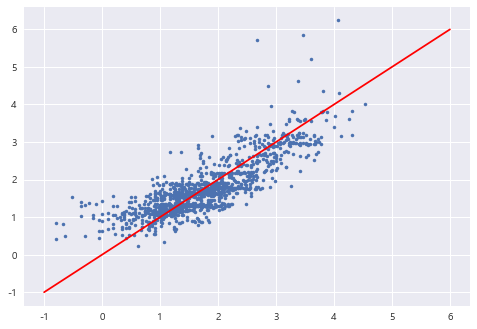

In [121]:
x = np.linspace(-1, 6, 100)
y1 =  x
plt.plot(y_test, lr.predict(X_test), '.')
plt.plot(x, y1,'r')
plt.show()

* 실제 값과 예측 값의 관계를 보면 선형성을 보이고 있으므로 선형성을 만족한다고 볼 수 있다.

#### 4-2. 정규성

In [123]:
import scipy.stats
pred = result.predict()
residual = y - pred

In [124]:
sz = scipy.stats.zscore(residual)
(x,y) , _ = scipy.stats.probplot(sz)

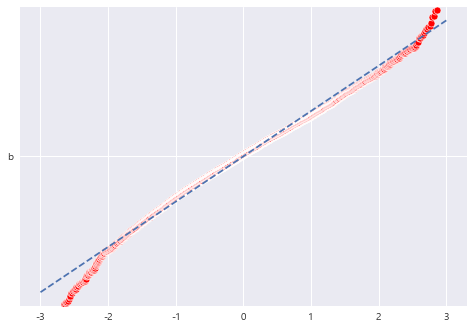

In [129]:
sns.scatterplot(x,y, color = 'r')
plt.plot([-3,3], [-3,3], '--', 'b')
plt.show()

* 오차에 대하여 Normal Q-Q Plot을 확인해 보면, 직선의 형태를 따라가는 것으로 보인다.  
* 따라서 정규성도 만족한다.

#### 4-3. 등분산성

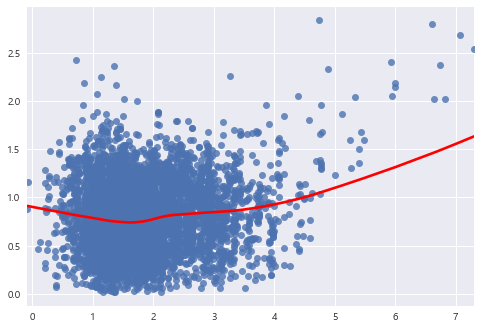

In [131]:
sns.regplot(pred, np.sqrt(np.abs(sz)), lowess = True, line_kws = {'color': 'red'})
plt.show()

* 잔차들의 분산을 확인해 보면 한곳에만 밀집되어 있는것을 확인 할 수 있다.
* 잔차와 입력변수간의 관련성이 없게 무작위적으로 분포되어야 등분산성 가정을 만족하지만 이 경우 등분산성을 만족하지 못한다는 것을 확인 할 수 있다.

#### 4-4. 독립성

In [133]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                          1.521e+04
Date:                Tue, 02 Feb 2021   Prob (F-statistic):                        0.00
Time:                        13:02:18   Log-Likelihood:                         -4405.5
No. Observations:                6019   AIC:                                      8823.
Df Residuals:                    6013   BIC:                                      8863.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

* 잔차의 독립성을 만족하는지 검정을 위해 더빈 왓슨 검정을 사용한다. 2에 가까울 수록 자기상관이 없음을 나타낸다,
* 이 데이터의 경우 더빈 왓슨 검정량이 1.982로 2에 가깝게 나오므로 독립성을 만족한다는 것을 확인할 수 있다.